## Dragon Real Estate - Price predictor

In [1]:
import pandas as pd

In [2]:
housing_data = pd.read_excel("hou_all.xlsx")

In [3]:
housing_data.head()

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:,MEDV:
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIM:     506 non-null    float64
 1   ZN:       506 non-null    float64
 2   INDUS:    506 non-null    float64
 3   CHAS:     506 non-null    int64  
 4   NOX:      506 non-null    float64
 5   RM:       501 non-null    float64
 6   AGE:      506 non-null    float64
 7   DIS:      506 non-null    float64
 8   RAD:      506 non-null    int64  
 9   TAX:      506 non-null    int64  
 10  PTRATIO:  506 non-null    float64
 11  B:        506 non-null    float64
 12  LSTAT:    506 non-null    float64
 13  MEDV:     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing_data["CHAS:"]

0      0
1      0
2      0
3      0
4      0
      ..
501    0
502    0
503    0
504    0
505    0
Name: CHAS:, Length: 506, dtype: int64

In [6]:
housing_data["CHAS:"].value_counts()

CHAS:
0    471
1     35
Name: count, dtype: int64

In [7]:
housing_data["CRIM:"].value_counts()

CRIM:
0.01501     2
14.33370    2
0.03466     1
0.03113     1
0.03049     1
           ..
1.51902     1
1.83377     1
1.46336     1
1.27346     1
0.04741     1
Name: count, Length: 504, dtype: int64

In [8]:
housing_data.describe()

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:,MEDV:
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286026,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705850,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
# %matplotlib inline 
# import matplotlib.pyplot as plt
# housing_data.hist(bins=50, figsize=(20,15))

 ## Train Test Splitting

In [10]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled= np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data) * test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices] , data.iloc[test_indices]
# train_set, test_set = split_train_test(housing_data,0.2)

In [11]:
# print(" Rows in train set:{len(train_set)} \n Rows in test set: {len(test_set)} ") 

In [12]:
# print(f" Rows in train set:{len(train_set)} \n Rows in test set: {len(test_set)} ")

In [13]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing_data,test_size=0.2,random_state=42)
print(f" Rows in train set:{len(train_set)} \n Rows in test set: {len(test_set)} ")

 Rows in train set:404 
 Rows in test set: 102 


In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit( n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing_data,housing_data["CHAS:"]):
    strat_train_set=housing_data.loc[train_index]
    strat_test_set=housing_data.loc[test_index]
    

# strat_test_set["CHAS:"].value_counts()

In [15]:
# strat_train_set["CHAS:"].value_counts()

In [16]:
housing_data= strat_train_set.copy()

## LOOKING FOR CORRELATIONS

array([[<Axes: xlabel='RM:', ylabel='RM:'>,
        <Axes: xlabel='ZN:', ylabel='RM:'>,
        <Axes: xlabel='MEDV:', ylabel='RM:'>,
        <Axes: xlabel='LSTAT:', ylabel='RM:'>],
       [<Axes: xlabel='RM:', ylabel='ZN:'>,
        <Axes: xlabel='ZN:', ylabel='ZN:'>,
        <Axes: xlabel='MEDV:', ylabel='ZN:'>,
        <Axes: xlabel='LSTAT:', ylabel='ZN:'>],
       [<Axes: xlabel='RM:', ylabel='MEDV:'>,
        <Axes: xlabel='ZN:', ylabel='MEDV:'>,
        <Axes: xlabel='MEDV:', ylabel='MEDV:'>,
        <Axes: xlabel='LSTAT:', ylabel='MEDV:'>],
       [<Axes: xlabel='RM:', ylabel='LSTAT:'>,
        <Axes: xlabel='ZN:', ylabel='LSTAT:'>,
        <Axes: xlabel='MEDV:', ylabel='LSTAT:'>,
        <Axes: xlabel='LSTAT:', ylabel='LSTAT:'>]], dtype=object)

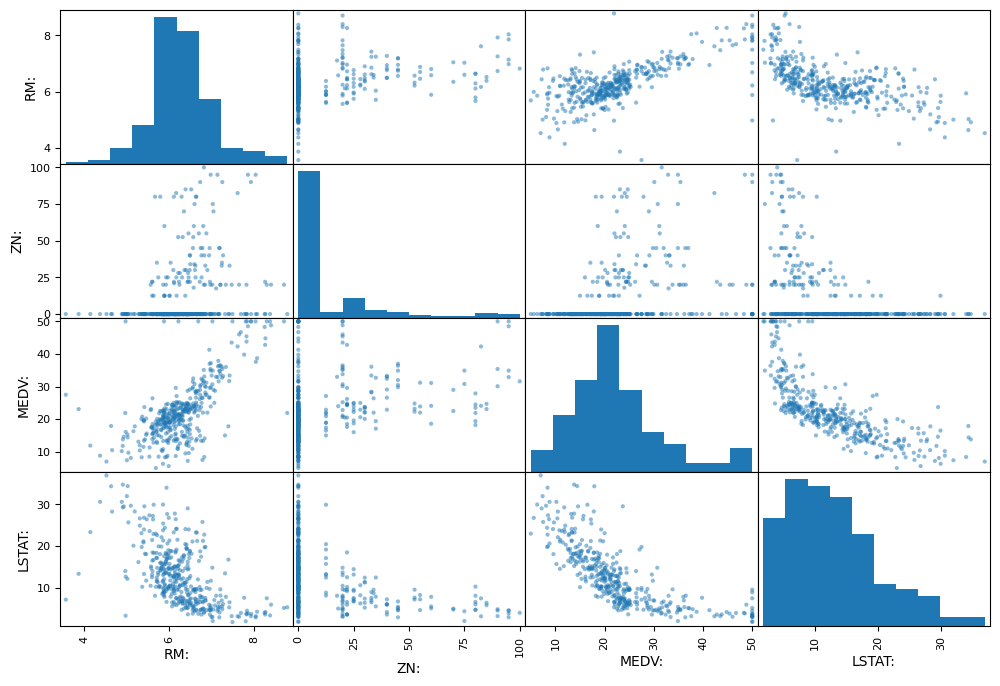

In [17]:
from pandas.plotting import scatter_matrix
attributes = ["RM:","ZN:","MEDV:","LSTAT:"]
scatter_matrix(housing_data[attributes], figsize=(12,8))

<Axes: xlabel='RM:', ylabel='MEDV:'>

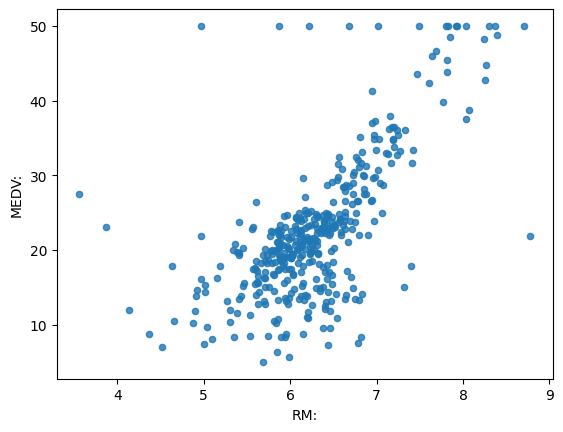

In [18]:
housing_data.plot(kind="scatter", x="RM:", y="MEDV:",alpha=0.8)

## Attribute combinations

In [19]:
 housing_data["TAXPRM:"]= housing_data["TAX:"] / housing_data["RM:"]

In [20]:
housing_data.head()

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:,MEDV:,TAXPRM:
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [21]:
corr_matrix = housing_data.corr()
corr_matrix["MEDV:"].sort_values(ascending= False)

MEDV:       1.000000
RM:         0.680053
B:          0.361761
ZN:         0.339741
DIS:        0.240451
CHAS:       0.205066
AGE:       -0.364596
RAD:       -0.374693
CRIM:      -0.393715
NOX:       -0.422873
TAX:       -0.456657
INDUS:     -0.473516
PTRATIO:   -0.493534
TAXPRM:    -0.527095
LSTAT:     -0.740494
Name: MEDV:, dtype: float64

<Axes: xlabel='TAXPRM:', ylabel='MEDV:'>

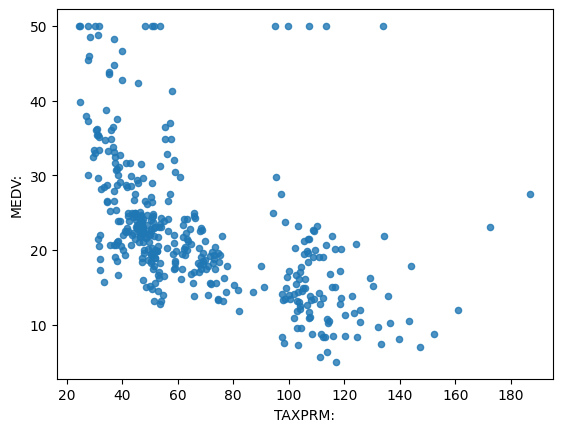

In [22]:
housing_data.plot(kind="scatter", x="TAXPRM:", y="MEDV:",alpha=0.8)

In [23]:
housing_data = strat_train_set.drop("MEDV:",axis=1)
housing_labels= strat_train_set["MEDV:"].copy()

## Missing Attributes

In [24]:
# To take care of missing attributes, you have three options:
#     1. Get rid of the missing data points
#     2. Get rid of the whole attribute
#     3. Set the missing values to some value(0, mean or median)

In [25]:
# Execution of option 1
a = housing_data.dropna(subset=["RM:"])
a.shape
# Note that original housing_data dataframe will remain unchanged

(401, 13)

In [26]:
# Execution of option 2:
housing_data.drop("RM:",axis=1).shape
# RM column will be removed
# Note that original housing_data dataframe will remain unchanged

(404, 12)

In [27]:
# Execution of option 3
median = housing_data["RM:"].median()
housing_data["RM:"].fillna(median)
# Note that original housing_data dataframe will remain unchanged
housing_data.shape


(404, 13)

In [28]:
housing_data.describe() # before we started filling missing attributes

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281564,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715387,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [29]:
from sklearn.impute import SimpleImputer
imputer= SimpleImputer(strategy="median")
imputer.fit(housing_data)

SimpleImputer(strategy='median')

In [30]:
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [31]:
imputer.statistics_.shape

(13,)

In [32]:
X = imputer.transform(housing_data)
housing_tr = pd.DataFrame(X,columns=housing_data.columns)
housing_tr.describe()

,CRIM:,ZN:,INDUS:,CHAS:,NOX:,RM:,AGE:,DIS:,RAD:,TAX:,PTRATIO:,B:,LSTAT:
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281077,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712742,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit- Learn Design

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method -  Fits the dataset and calculates internal parameters.
2. Transformers - transform method takes input and return output based on the learnings from fit() . It also has a convinience function called fit_transform() which fits and then transforms.
3. Predictors - LinearRegression model is an example of predictor. ,fit() and .predict() are two comman functions. It also gives score() function which will evalute the predictions.

## Feature Scaling 

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
   (value-min)/(max-min)
   Sklearn provides a class called MinMaxScaler for this
2. Standardization
   (value-mean)/std
   Sklearn provides a class called Standard Scaler for this

## Creating a Pipeline 

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # ...... add as many as you want in pipeline
    ('std_scaler', StandardScaler()),
])


In [34]:
housing_num_tr = my_pipeline.fit_transform(housing_data)

In [35]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Dragon Real Estates

In [36]:
housing_num_tr.shape

(404, 13)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
# model = LinearRegression()
# model= DecisionTreeRegressor()
model = RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [38]:
some_data = housing_data.iloc[:5]

In [39]:
some_labels = housing_labels.iloc[:5]

In [40]:
prepared_data = my_pipeline.transform(some_data)

In [41]:
model.predict(prepared_data)

array([22.247, 25.689, 16.524, 23.269, 23.587])

In [42]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV:, dtype: float64

In [43]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating th model

In [44]:
from sklearn.metrics import mean_squared_error

import numpy as np
housing_predictions = model.predict(housing_num_tr)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)

In [45]:
lin_rmse

1.2433211950495355

Now since mean squared error is coming out to be zero, this means model has overfitted the data.
## So we must use a better evaluation technique - i.e. Cross Validation

In [46]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores = np.sqrt(-scores)

In [47]:
rmse_scores

array([2.85621868, 2.85656481, 4.51428824, 2.70287303, 3.43576217,
       2.62238244, 5.10259716, 3.40464301, 3.07646785, 3.45452802])

In [48]:
def print_scores(scores):
    print("Scores:" , scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [49]:
print_scores(rmse_scores)

Scores: [2.85621868 2.85656481 4.51428824 2.70287303 3.43576217 2.62238244
 5.10259716 3.40464301 3.07646785 3.45452802]
Mean: 3.402632540664471
Standard deviation: 0.7701329717963165


## Saving the Model 

In [50]:
from joblib import dump,load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

## Testing the Model on Test Data

In [57]:
X_test = strat_test_set.drop("MEDV:",axis=1)
Y_test = strat_test_set["MEDV:"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)
print(final_predictions, list(Y_test))

2.9051946645992044
[24.874 11.46  25.556 22.184 18.333 14.963 19.674 14.184 32.346 41.24
 19.484 12.076 23.477 26.528 19.347 11.012 31.774 14.72  23.612 18.077
 20.279 18.144 16.765 21.914 18.366 31.317 16.185 33.16   8.623 34.128
 24.48  21.33  22.719 11.223 21.012 10.672 43.442 24.619 23.69  42.24
 24.079 31.258 20.681 20.969 18.591 33.599 44.994 19.952 20.281 21.99
 21.532 14.642 20.92  14.713 25.204 33.395 42.694 28.97  19.395 20.596
 47.488  9.064 19.177 25.977 14.207 33.369 19.823 18.169 19.328 34.597
 26.613 22.647 21.339 22.654 34.98  13.186 15.813 19.891 20.83  21.395
 22.606 21.308 14.347 23.149 20.541 21.014 13.384 21.285 21.98  23.008
 18.553 27.211  7.225 26.324 18.325 29.939 19.762 30.867 14.383 26.419
 21.264 20.111] [16.5, 10.2, 30.1, 23.0, 14.4, 15.6, 19.4, 14.1, 30.3, 35.2, 23.1, 13.8, 25.0, 27.9, 19.5, 12.3, 32.2, 13.5, 23.8, 21.7, 19.2, 19.5, 10.4, 23.2, 18.6, 28.5, 15.2, 32.0, 7.2, 34.6, 20.1, 20.6, 23.6, 13.1, 23.8, 12.7, 43.1, 24.7, 22.2, 44.0, 28.1, 31.0, 21.7, 